<a href="https://colab.research.google.com/github/suryanshshah2006/Deep-Learning-Fundamentals/blob/main/Cat_vs_Dog_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 999, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/urllib3/connectionpool.py", line 13, in <module>
    from .connection import (
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/urllib3/connection.py", line 15, in <module>
    from .util.proxy import create_proxy_ssl_context
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/urllib3/util/__init__.py", line 8, in <module>
    from .ssl_ import (
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/urllib3/util/ssl_.py", line 17, in <module>
    from .url import BRACELESS_IPV6_ADDRZ_RE, IPV4_RE
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/urllib3/util/url.py"

In [ ]:
import json
import os

# Your specific credentials from your screenshot
kaggle_username = 'suryanshshah'
kaggle_token = 'KGAT_c6e62e674ce15cae2dd30a93bf313757'

# Create the .kaggle directory and the file
! mkdir -p ~/.kaggle
with open('kaggle.json', 'w') as f:
    json.dump({"username": kaggle_username, "key": kaggle_token}, f)

# Move the file to the correct location and set secure permissions
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

print("Kaggle authentication successful!")

Kaggle authentication successful!


In [ ]:
# API command for the Dog_vs_cat_data dataset
! kaggle datasets download -d dinesh873/dog-vs-cat-data

Dataset URL: https://www.kaggle.com/datasets/dinesh873/dog-vs-cat-data
License(s): MIT
 92% 0.98G/1.06G [00:08<00:02, 39.0MB/s]
100% 1.06G/1.06G [00:08<00:00, 135MB/s] 


In [ ]:
# Unzip the downloaded file (The file name is based on the dataset name)
! unzip dog-vs-cat-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

Using generators here because there is large amount of data

label model int because cat will get 0 and dogs will get 1

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


now the images are stored in numpy array and it is between 0 to 255 so we have to change it to 0 to 1 so we have to normalize it

In [ ]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.5756 - loss: 0.7172 - val_accuracy: 0.7522 - val_loss: 0.5206
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7639 - loss: 0.4928 - val_accuracy: 0.7752 - val_loss: 0.4768
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.8234 - loss: 0.3954 - val_accuracy: 0.7794 - val_loss: 0.5241
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8848 - loss: 0.2688 - val_accuracy: 0.7922 - val_loss: 0.6455
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9413 - loss: 0.1511 - val_accuracy: 0.7836 - val_loss: 0.7933
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9668 - loss: 0.0886 - val_accuracy: 0.7752 - val_loss: 0.8992
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9776 - loss: 0.0671 - val_accuracy: 0.7806 - val_loss: 1.0524
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9852 - loss: 0.0393 - 

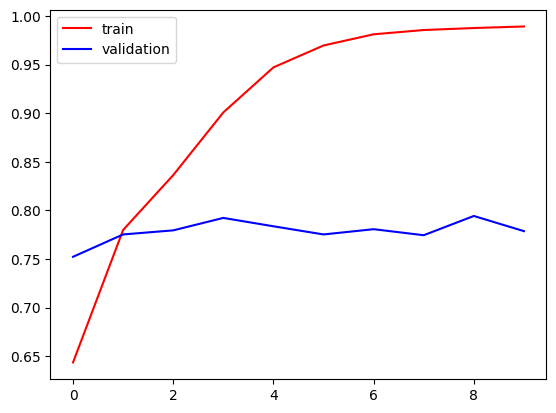

In [ ]:
plt.plot(model.history.history['accuracy'], color = 'red', label='train')
plt.plot(model.history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

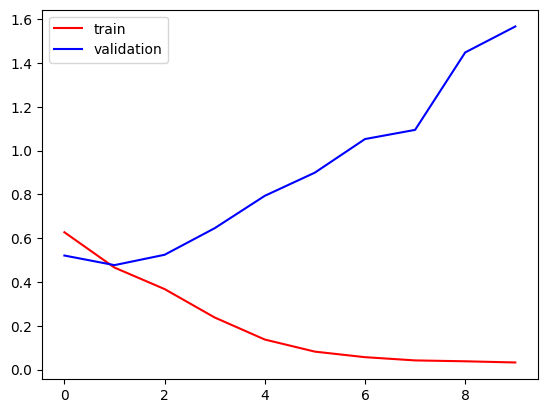

In [ ]:
plt.plot(model.history.history['loss'], color = 'red', label='train')
plt.plot(model.history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

BOTH THE GRAPGHS SHOW THAT THERE IS OVERFITTING AS ACCURACY FOR TEST DATASET IS LOW AND LOSS IS HIGH

FIRST WE USE BATCH NORMALIZATION AND DROPOUT REGULARIZATION FOR REDUCING OVERFITTING

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile (optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 91ms/step - accuracy: 0.5745 - loss: 2.7230 - val_accuracy: 0.6478 - val_loss: 0.6491
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6767 - loss: 0.5984 - val_accuracy: 0.6522 - val_loss: 0.7374
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.7452 - loss: 0.5221 - val_accuracy: 0.7166 - val_loss: 0.5428
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7959 - loss: 0.4422 - val_accuracy: 0.7662 - val_loss: 0.4791
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8304 - loss: 0.3775 - val_accuracy: 0.7456 - val_loss: 0.5716
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8674 - loss: 0.3057 - val_accuracy: 0.7494 - val_loss: 0.5957
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9000 - loss: 0.2435 - val_accuracy: 0.7956 - val_loss: 0.6615
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.9388 - loss: 0.1607 - 

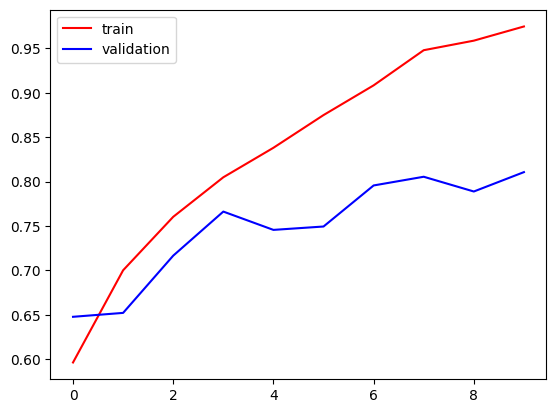

In [ ]:
plt.plot(model.history.history['accuracy'], color = 'red', label='train')
plt.plot(model.history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

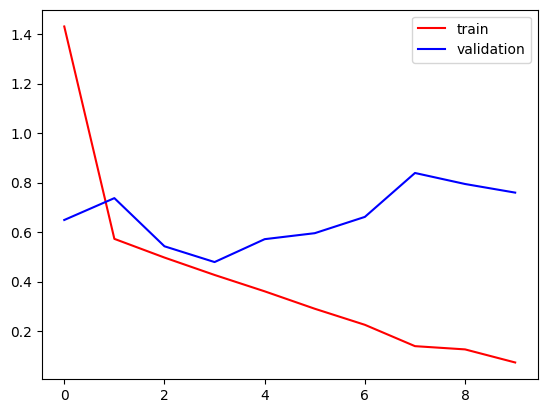

In [ ]:
plt.plot(model.history.history['loss'], color = 'red', label='train')
plt.plot(model.history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_imag = cv2.imread('/content/Screenshot 2025-12-14 130701.png')

In [ ]:
test_imag.shape

(379, 607, 3)

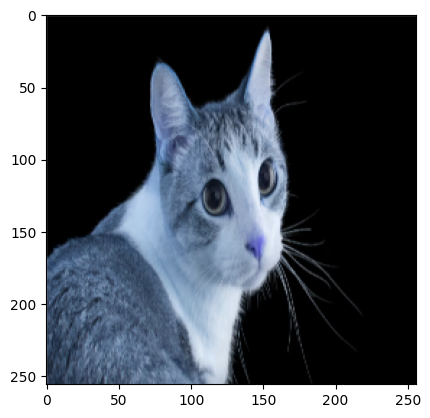

In [ ]:
plt.imshow(test_imag)

In [ ]:
test_imag = cv2.resize(test_imag, (256, 256))

In [ ]:
test_input = test_imag.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
test_imag2 = cv2.imread('/content/Screenshot 2025-12-14 131028.png')

In [ ]:
test_imag2 = cv2.resize(test_imag2, (256, 256))

In [ ]:
test_input2 = test_imag2.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)